## 1. 필요 라이브러리 가져오기

In [1]:
# 한글로 그래프 제목 입력해도 글씨 깨지지 않게 함
# 코드 실행후 런타임 다시 시작하기!!

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (21.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length}bytes'.format(name = fn, length = len(uploaded[fn])))

Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv
User uploaded file "sample_submission.csv" with length 3264bytes
User uploaded file "test.csv" with length 30073bytes
User uploaded file "train.csv" with length 125760bytes


In [2]:
# !pip install koreanize-matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
# import koreanize_matplotlib
warnings.filterwarnings('ignore')
%matplotlib inline


plt.style.use('seaborn')
sns.set(font_scale=2.5)
plt.rc("font", family="NanumBarunGothic")
plt.rc("axes", unicode_minus=False)

## 2. 데이터셋 확인

In [3]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

* target label : N_category(전이 여부)
    * 0 : 전이 x / 1 : 전이 o

In [4]:
df_train.head()

,ID,img_path,mask_path,나이,수술연월일,진단명,암의 위치,암의 개수,암의 장경,NG,...,ER_Allred_score,PR,PR_Allred_score,KI-67_LI_percent,HER2,HER2_IHC,HER2_SISH,HER2_SISH_ratio,BRCA_mutation,N_category
0,BC_01_0001,./train_imgs/BC_01_0001.png,-,63,2015-10-23,1,2,1,19.0,2.0,...,8.0,1.0,6.0,12.0,0.0,1.0,NaN,NaN,NaN,0
1,BC_01_0002,./train_imgs/BC_01_0002.png,-,51,2015-10-28,1,1,1,22.0,3.0,...,NaN,0.0,NaN,70.0,0.0,0.0,NaN,NaN,NaN,1
2,BC_01_0003,./train_imgs/BC_01_0003.png,-,37,2015-10-29,1,2,1,NaN,2.0,...,7.0,1.0,4.0,7.0,0.0,1.0,NaN,NaN,0.0,0
3,BC_01_0004,./train_imgs/BC_01_0004.png,-,54,2016-03-08,1,2,1,0.0,3.0,...,NaN,0.0,NaN,1.0,1.0,3.0,NaN,NaN,NaN,0
4,BC_01_0005,./train_imgs/BC_01_0005.png,-,57,2015-10-30,1,2,1,8.0,2.0,...,8.0,0.0,NaN,8.0,1.0,2.0,1.0,5.44,NaN,0


In [ ]:
df_train.describe()

,나이,진단명,암의 위치,암의 개수,암의 장경,NG,HG,HG_score_1,HG_score_2,HG_score_3,...,ER_Allred_score,PR,PR_Allred_score,KI-67_LI_percent,HER2,HER2_IHC,HER2_SISH,HER2_SISH_ratio,BRCA_mutation,N_category
count,1000.000000,1000.000000,1000.000000,1000.000000,931.000000,949.000000,914.000000,908.000000,908.000000,911.000000,...,703.000000,999.000000,547.000000,765.000000,986.000000,976.000000,247.000000,175.000000,55.000000,1000.000000
mean,53.679000,1.289000,1.561000,1.133000,18.375564,2.070601,1.897155,2.588106,2.144273,1.428101,...,7.014225,0.641642,6.049360,18.037229,0.247465,1.253074,0.129555,2.460457,0.145455,0.514000
std,11.253471,0.796312,0.559099,0.339745,12.037144,0.692234,0.713147,0.654011,0.655820,0.714866,...,1.125879,0.479758,2.734821,18.846473,0.431758,0.939444,0.336495,7.399121,0.524164,0.500054
min,25.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,1.000000,1.000000,1.000000,11.000000,2.000000,1.000000,2.000000,2.000000,1.000000,...,7.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,1.130000,0.000000,0.000000
50%,52.000000,1.000000,2.000000,1.000000,17.000000,2.000000,2.000000,3.000000,2.000000,1.000000,...,7.000000,1.000000,6.000000,10.000000,0.000000,1.000000,0.000000,1.270000,0.000000,1.000000
75%,62.000000,1.000000,2.000000,1.000000,23.000000,3.000000,2.000000,3.000000,3.000000,2.000000,...,8.000000,1.000000,7.000000,25.000000,0.000000,2.000000,0.000000,1.675000,0.000000,1.000000
max,93.000000,4.000000,3.000000,2.000000,110.000000,3.000000,3.000000,3.000000,3.000000,4.000000,...,8.000000,1.000000,54.000000,97.000000,1.000000,3.000000,1.000000,94.000000,2.000000,1.000000


In [5]:
df_test.describe()

,나이,진단명,암의 위치,암의 개수,암의 장경,NG,HG,HG_score_1,HG_score_2,HG_score_3,...,ER,ER_Allred_score,PR,PR_Allred_score,KI-67_LI_percent,HER2,HER2_IHC,HER2_SISH,HER2_SISH_ratio,BRCA_mutation
count,250.000000,250.000000,250.000000,250.00000,237.000000,235.000000,234.000000,232.000000,232.000000,232.000000,...,250.000000,175.000000,250.00000,133.000000,198.000000,244.000000,247.000000,61.000000,45.000000,12.0
mean,55.272000,1.204000,1.536000,1.13200,18.793249,2.076596,1.974359,2.659483,2.155172,1.478448,...,0.780000,6.988571,0.62000,6.000000,17.404697,0.274590,1.352227,0.213115,2.290222,0.0
std,12.051347,0.678399,0.523258,0.33917,11.831040,0.662233,0.717190,0.588854,0.618663,0.720426,...,0.415077,1.273012,0.48636,1.723281,18.853141,0.447225,0.992566,0.412907,2.092727,0.0
min,31.000000,1.000000,1.000000,1.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,2.000000,0.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.990000,0.0
25%,46.000000,1.000000,1.000000,1.00000,11.000000,2.000000,1.000000,2.000000,2.000000,1.000000,...,1.000000,7.000000,0.00000,5.000000,5.000000,0.000000,1.000000,0.000000,1.130000,0.0
50%,53.000000,1.000000,2.000000,1.00000,17.000000,2.000000,2.000000,3.000000,2.000000,1.000000,...,1.000000,7.000000,1.00000,6.000000,10.000000,0.000000,1.000000,0.000000,1.310000,0.0
75%,63.750000,1.000000,2.000000,1.00000,24.000000,3.000000,2.000000,3.000000,3.000000,2.000000,...,1.000000,8.000000,1.00000,8.000000,21.020000,1.000000,2.000000,0.000000,2.500000,0.0
max,86.000000,4.000000,3.000000,2.00000,76.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,1.000000,8.000000,1.00000,8.000000,95.000000,1.000000,3.000000,1.000000,10.000000,0.0


### 2.1 Null data check

In [ ]:
for col in df_train.columns:
    msg = '변수명: {:>10}\t NaN 값의 확률: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

변수명:         ID	 NaN 값의 확률: 0.00%
변수명:   img_path	 NaN 값의 확률: 0.00%
변수명:  mask_path	 NaN 값의 확률: 0.00%
변수명:         나이	 NaN 값의 확률: 0.00%
변수명:      수술연월일	 NaN 값의 확률: 0.00%
변수명:        진단명	 NaN 값의 확률: 0.00%
변수명:      암의 위치	 NaN 값의 확률: 0.00%
변수명:      암의 개수	 NaN 값의 확률: 0.00%
변수명:      암의 장경	 NaN 값의 확률: 6.90%
변수명:         NG	 NaN 값의 확률: 5.10%
변수명:         HG	 NaN 값의 확률: 8.60%
변수명: HG_score_1	 NaN 값의 확률: 9.20%
변수명: HG_score_2	 NaN 값의 확률: 9.20%
변수명: HG_score_3	 NaN 값의 확률: 8.90%
변수명: DCIS_or_LCIS_여부	 NaN 값의 확률: 0.00%
변수명: DCIS_or_LCIS_type	 NaN 값의 확률: 87.40%
변수명: T_category	 NaN 값의 확률: 0.40%
변수명:         ER	 NaN 값의 확률: 0.10%
변수명: ER_Allred_score	 NaN 값의 확률: 29.70%
변수명:         PR	 NaN 값의 확률: 0.10%
변수명: PR_Allred_score	 NaN 값의 확률: 45.30%
변수명: KI-67_LI_percent	 NaN 값의 확률: 23.50%
변수명:       HER2	 NaN 값의 확률: 1.40%
변수명:   HER2_IHC	 NaN 값의 확률: 2.40%
변수명:  HER2_SISH	 NaN 값의 확률: 75.30%
변수명: HER2_SISH_ratio	 NaN 값의 확률: 82.50%
변수명: BRCA_mutation	 NaN 값의 확률: 94.50%
변수명: N_category	 NaN 값의 확률: 0.00%


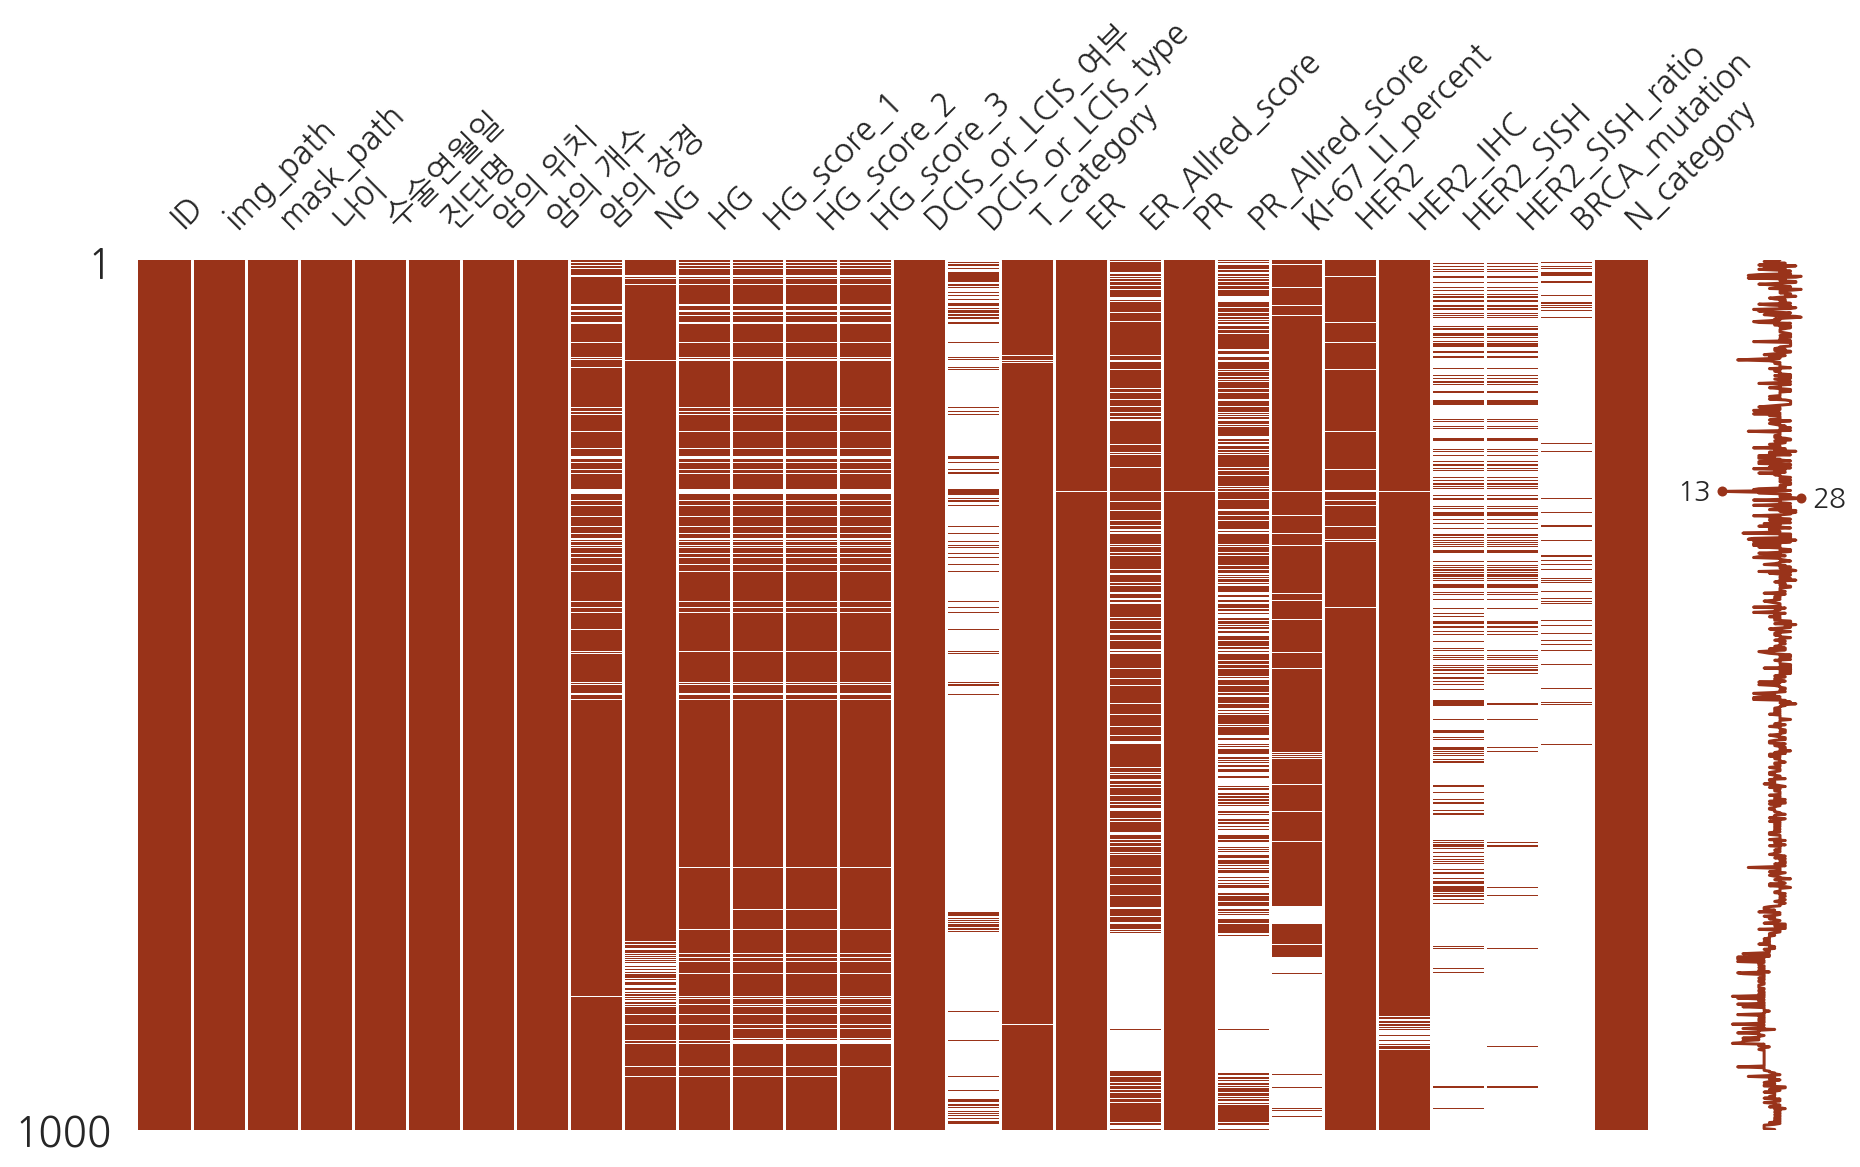

In [ ]:
msno.matrix(df = df_train.iloc[:, :], figsize = (15, 8), color = (0.6, 0.2, 0.1))

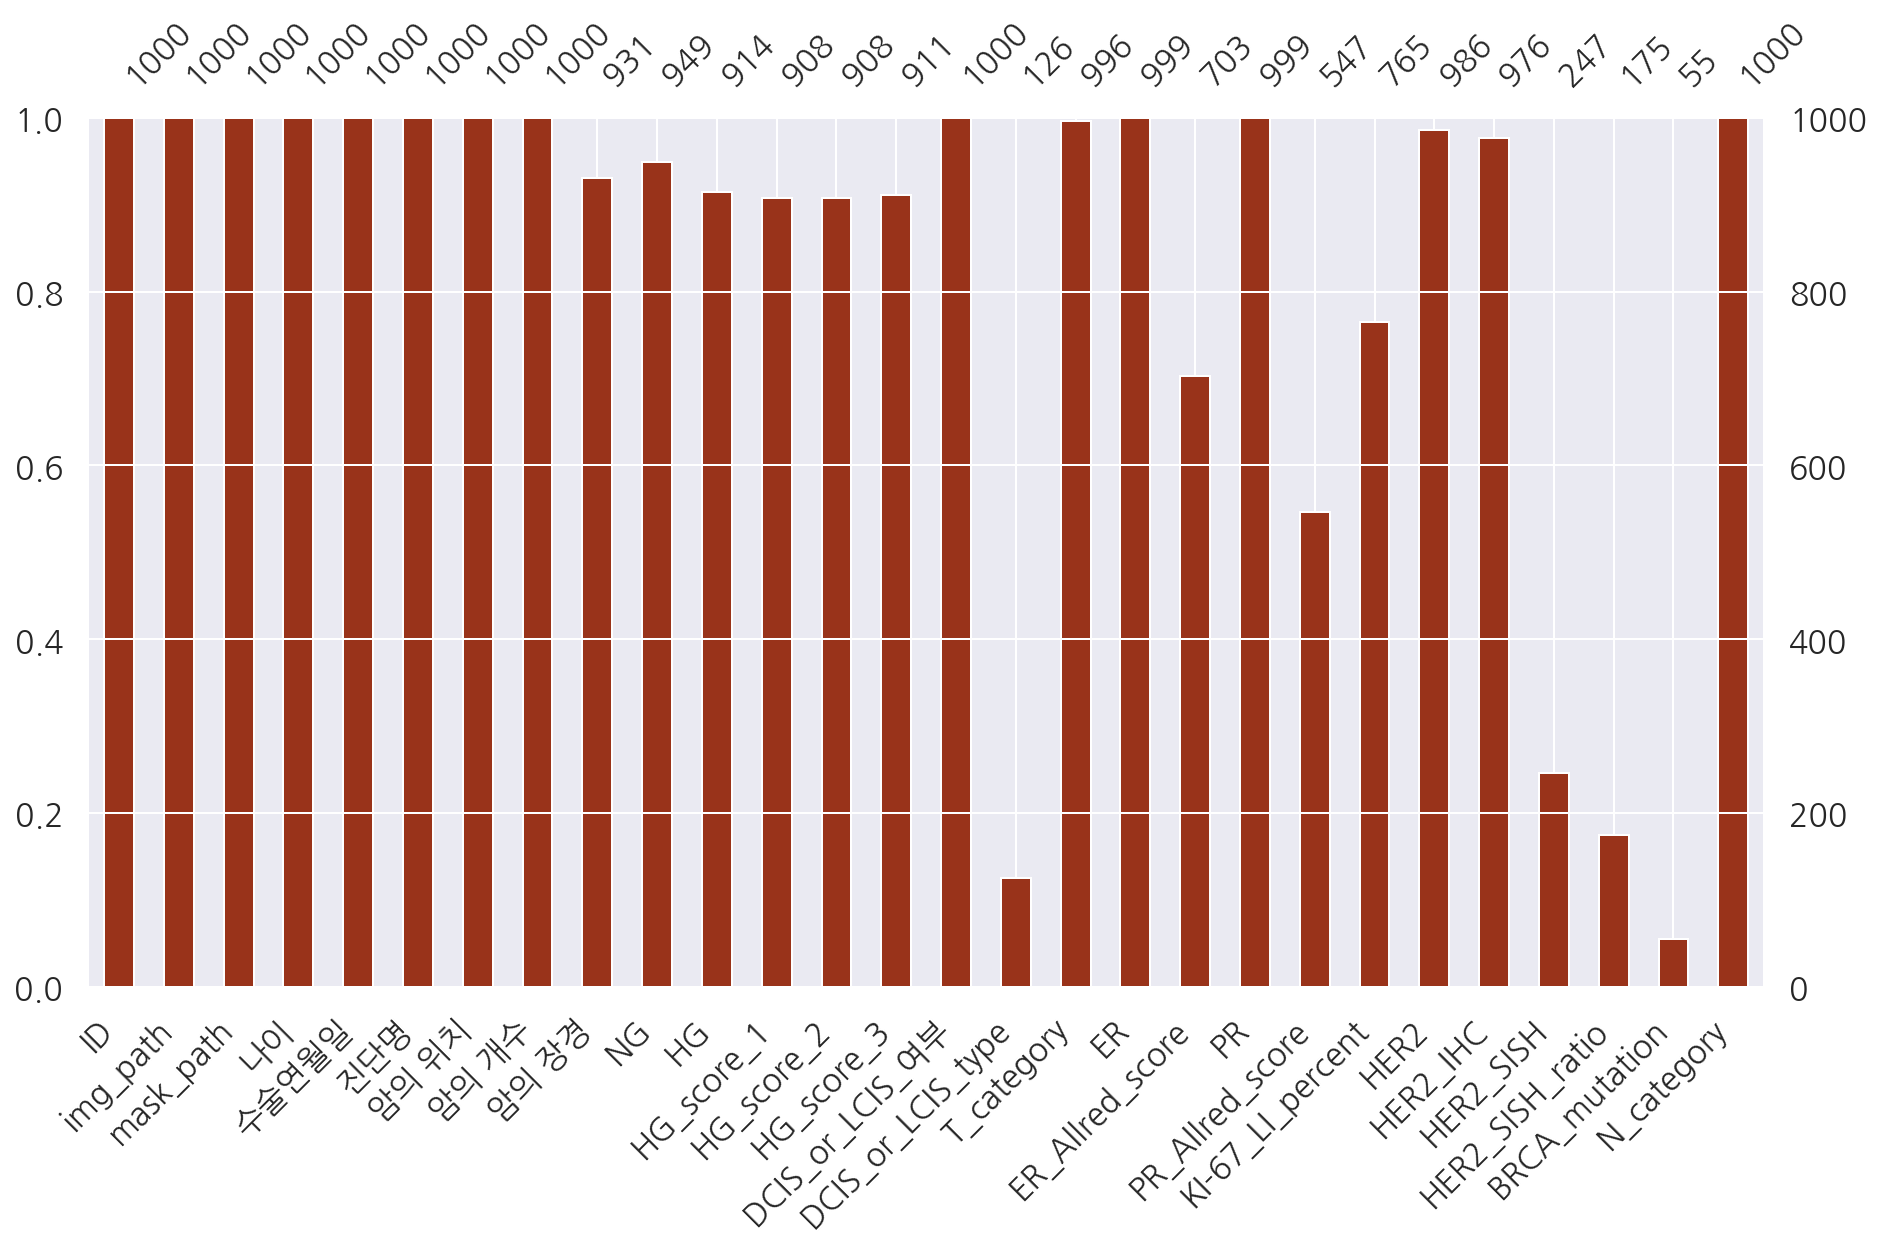

In [ ]:
msno.bar(df = df_train.iloc[:, :], figsize = (15, 8), color = (0.6, 0.2, 0.1))

* DCIS_or_LCIS_type, HER2_SISH, HER2_SISH_ratio, BRCA_mutation 변수에 결측값이 많다. 

### 2.2 Target label 확인

* binary classification 문제의 경우 0,1의 분포가 어떠냐에 따라 모델의 평가 방법이 달라진다.

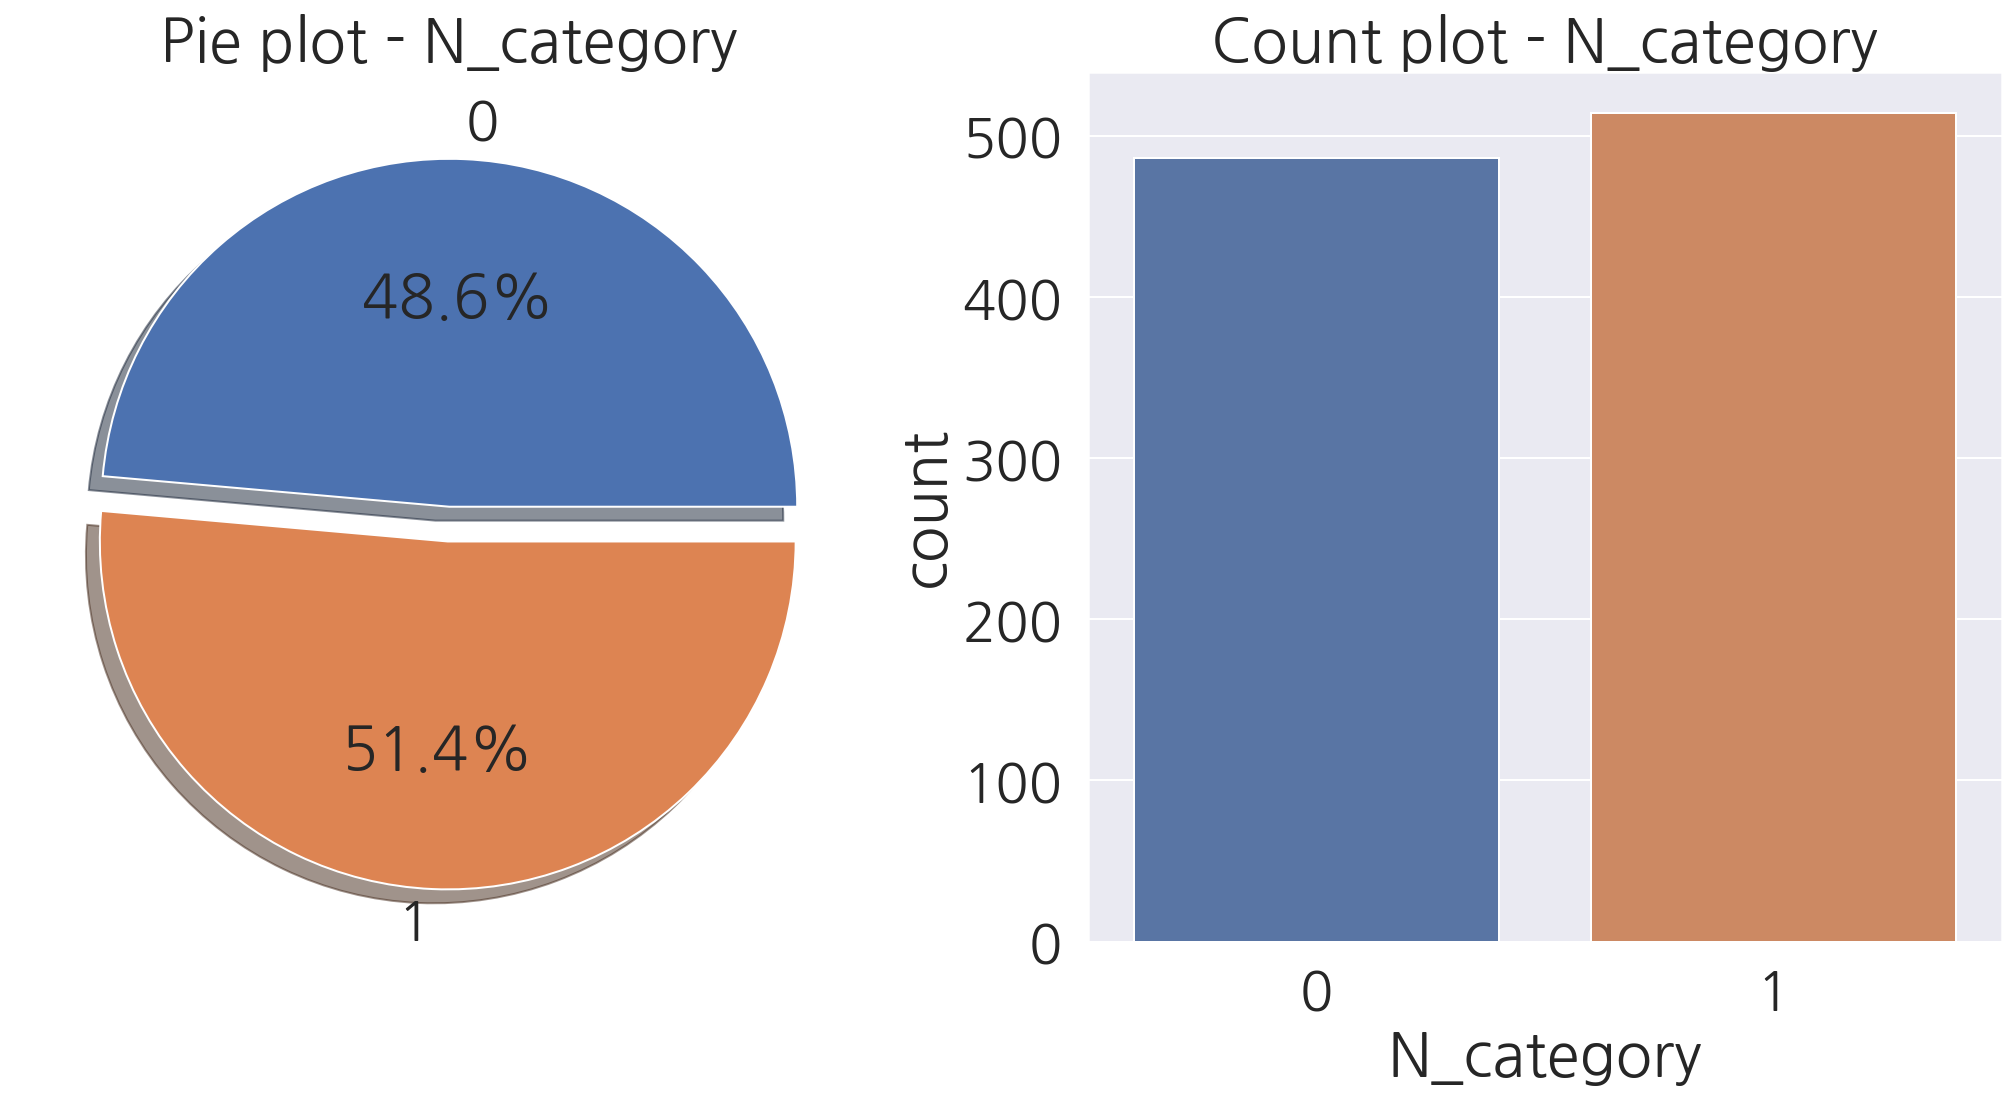

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train['N_category'].value_counts().sort_values().plot.pie(explode=[0, 0.1], autopct = '%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Pie plot - N_category')
ax[0].set_ylabel('')
sns.countplot('N_category', data = df_train, ax = ax[1])
ax[1].set_title('Count plot - N_category')

plt.show()

* target label의 분포가 균일하다.
* 전이가 안된 경우가 48.6%, 전이가 된 경우가 51.4%이다.

## 3. EDA

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1000 non-null   object 
 1   img_path           1000 non-null   object 
 2   mask_path          1000 non-null   object 
 3   나이                 1000 non-null   int64  
 4   수술연월일              1000 non-null   object 
 5   진단명                1000 non-null   int64  
 6   암의 위치              1000 non-null   int64  
 7   암의 개수              1000 non-null   int64  
 8   암의 장경              931 non-null    float64
 9   NG                 949 non-null    float64
 10  HG                 914 non-null    float64
 11  HG_score_1         908 non-null    float64
 12  HG_score_2         908 non-null    float64
 13  HG_score_3         911 non-null    float64
 14  DCIS_or_LCIS_여부    1000 non-null   int64  
 15  DCIS_or_LCIS_type  126 non-null    float64
 16  T_category         996 no

### 3.1 진단명

* 1 : ductal(관암) - 나쁜 예후 / 2 : lobular(소엽암) - 중간 예후 / 3 : mucinous(점액암) - 좋은 예후 / 4 : other
* ductal이 전이율이 가장높고 mucinous가 전이율이 가장 낮을 것으로 예상된다.

In [ ]:
# 진단명별 몇명씩 있지는 확인
df_train[['진단명', 'N_category']].groupby(['진단명'], as_index=True).count()

,N_category
진단명,
1,857
2,65
3,10
4,68


In [ ]:
# 진단명별 전이된 사람의 총합
df_train[['진단명', 'N_category']].groupby(['진단명'], as_index = True).sum()

,N_category
진단명,
1,443
2,41
3,2
4,28


In [ ]:
pd.crosstab(df_train['진단명'], df_train['N_category'], margins = True).style.background_gradient(cmap = 'summer_r')

N_category,0,1,All
진단명,,,
1,414,443,857
2,24,41,65
3,8,2,10
4,40,28,68
All,486,514,1000


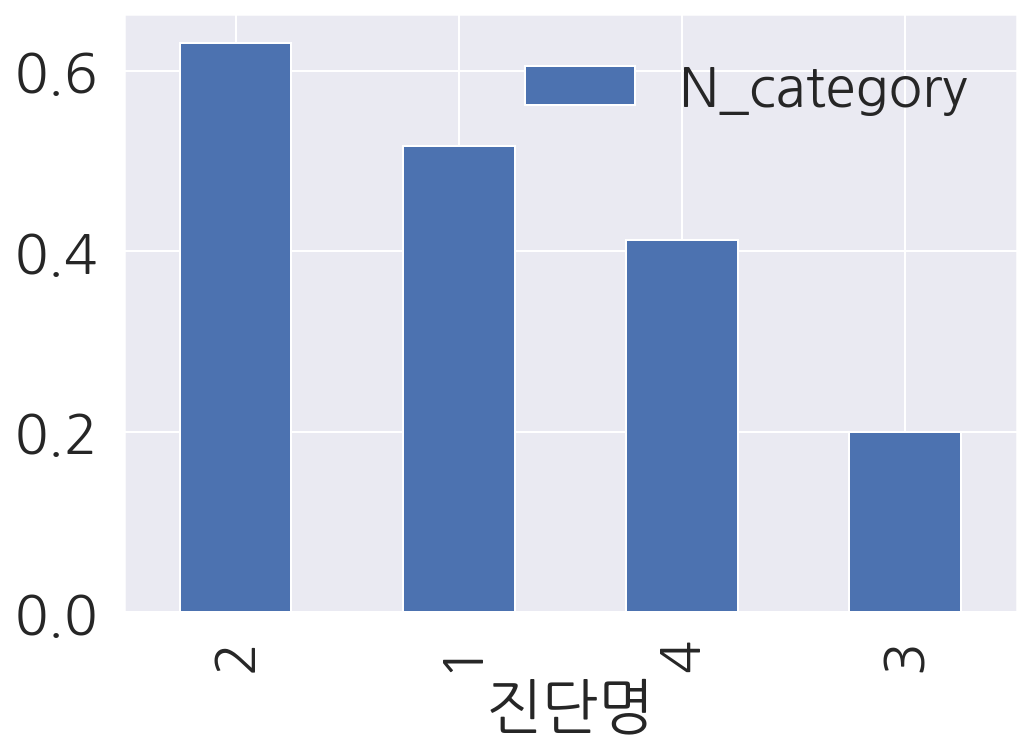

In [ ]:
df_train[['진단명', 'N_category']].groupby(['진단명'], as_index = True).mean().sort_values(by='N_category', ascending = False).plot.bar()

* 예상했던대로 예후가 좋은 case인 mucinous의 전이율은 가장 낮았다.
* 하지만 전이율이 가장 높을것이라고 예상했던 ductal보다 lobular유형이 전이율이 더 높게 나타났다.
* 물론 case의 수 자체에 큰 차이가 있기 때문에 큰 의미가 없을 수는 있다.
* 결론적으로 예후가 나쁜쪽에 있는 case들이 전이율은 높다.

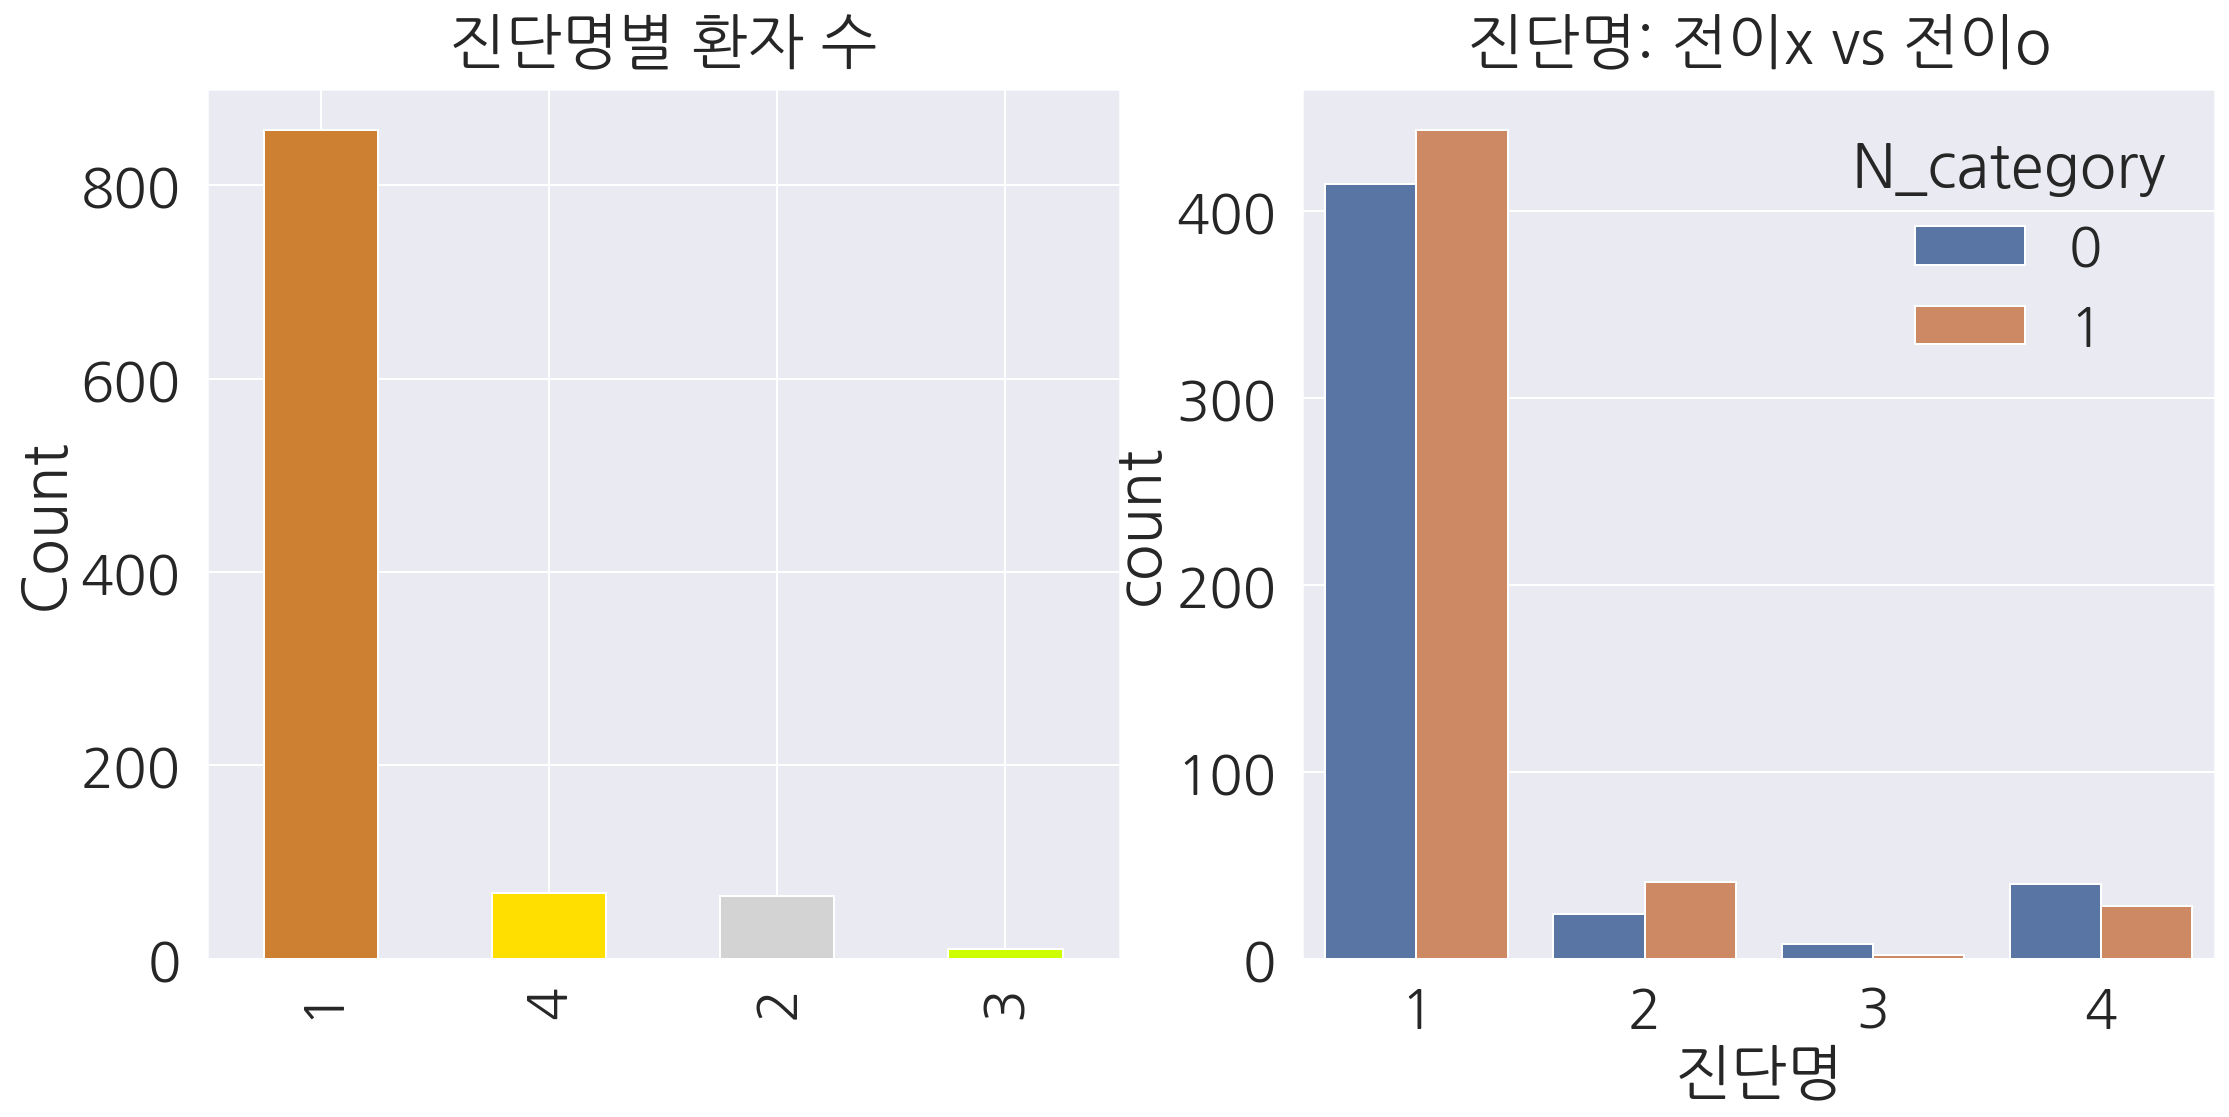

In [ ]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize = (18,8))
df_train['진단명'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3', '#CDFF00'], ax=ax[0])
ax[0].set_title('진단명별 환자 수', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('진단명', hue='N_category', data=df_train, ax=ax[1])
ax[1].set_title('진단명: 전이x vs 전이o', y=y_position)
plt.show()

* ductal case가 워낙 많기는 하지만 나쁘거나 중간 예후인 진단명들의 전이확률은 전이 안될 확률보다 높고 좋은 예후인 진단명은 전이확률이 더 낮다.

### 3.2 암의 개수

* 1 : single(1개) / 2 : multiple(여러개)
* 암의 개수가 1개일 때보다는 여러개 있을때 전이확률이 높을 것 같다.

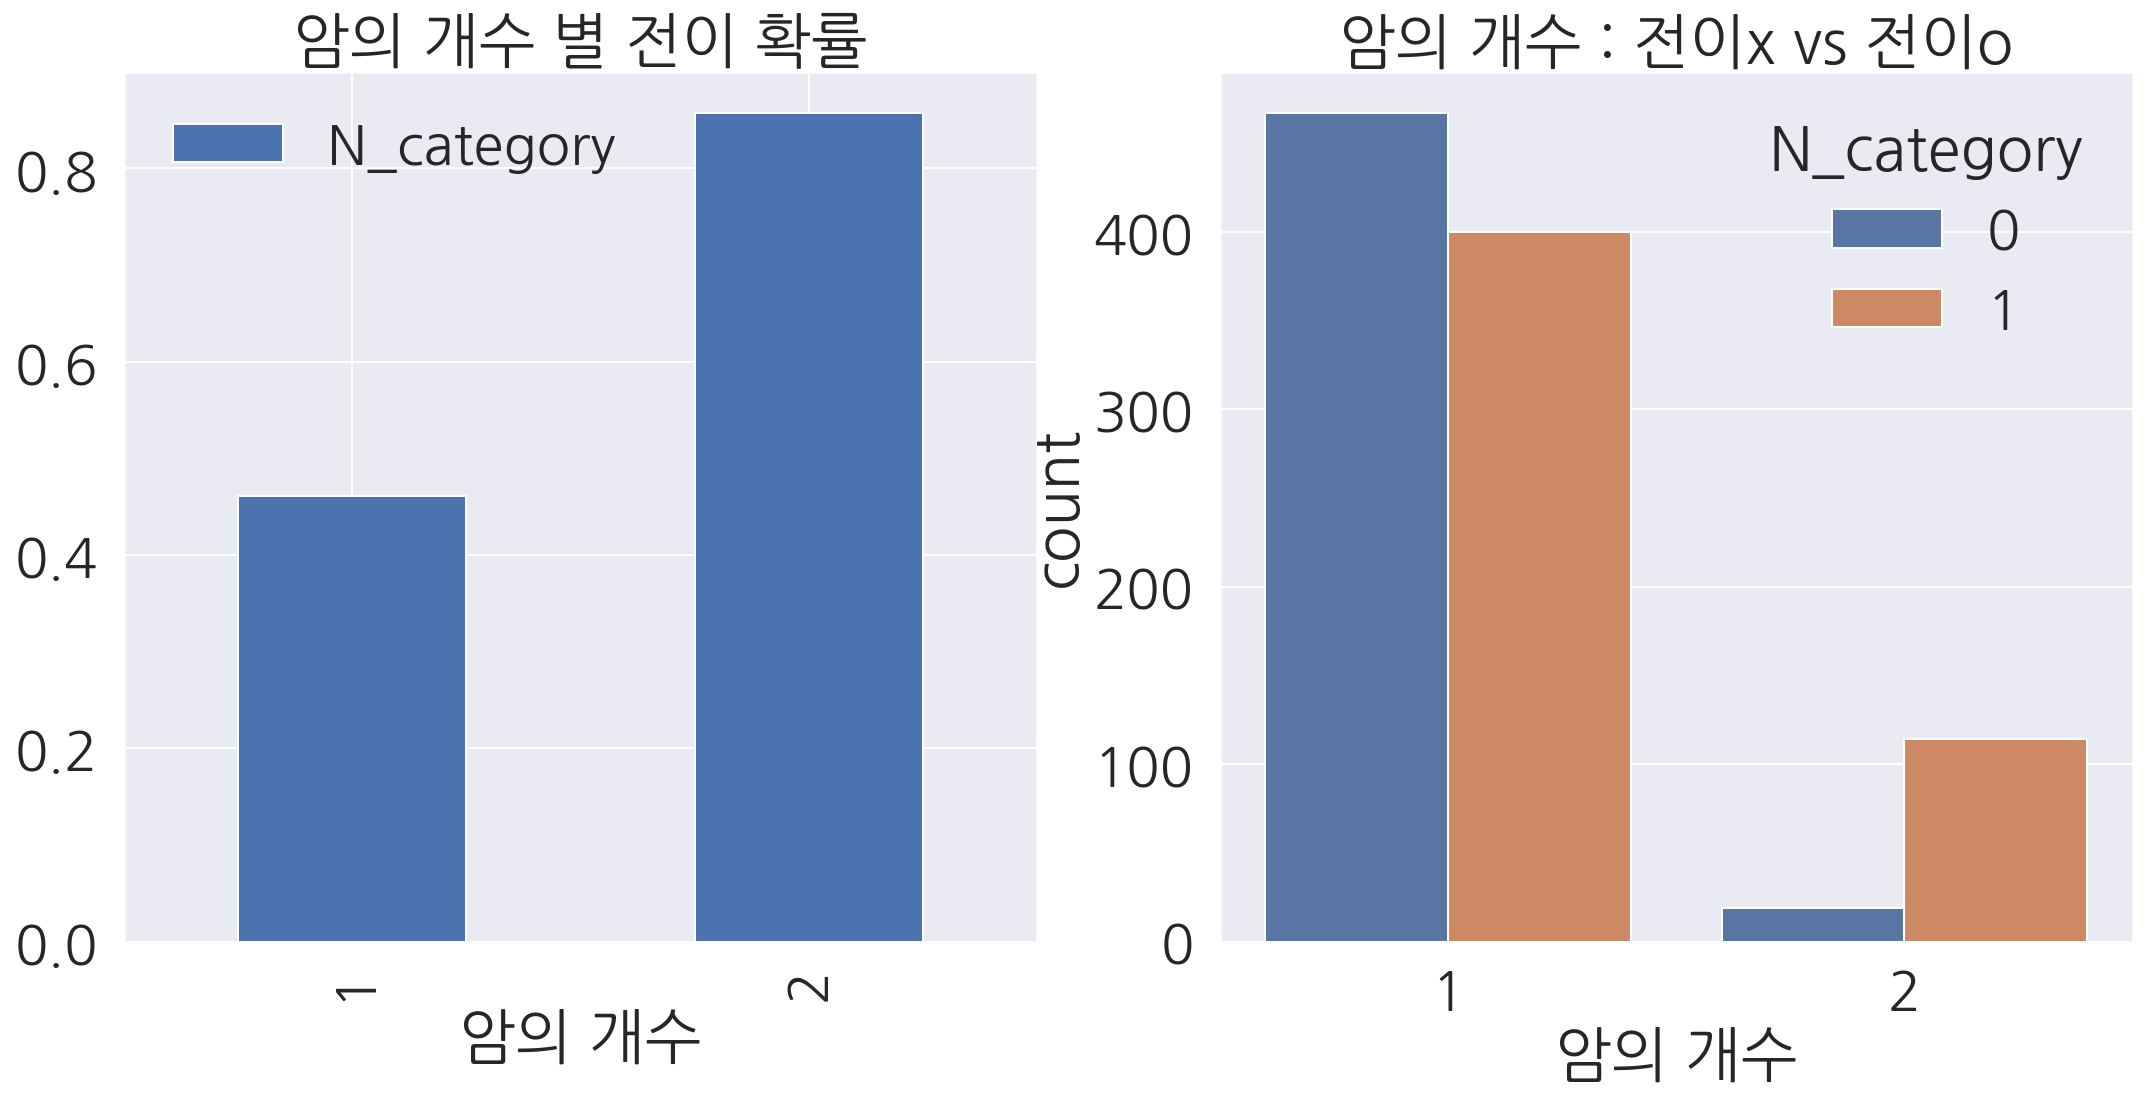

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['암의 개수', 'N_category']].groupby(['암의 개수'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('암의 개수 별 전이 확률')
sns.countplot('암의 개수', hue='N_category', data=df_train, ax=ax[1])
ax[1].set_title('암의 개수 : 전이x vs 전이o')
plt.show()

In [ ]:
df_train[['암의 개수', 'N_category']].groupby(['암의 개수'], as_index = False).mean().sort_values(by = 'N_category', ascending = False)

,암의 개수,N_category
1,2,0.857143
0,1,0.461361


In [ ]:
pd.crosstab(df_train['암의 개수'], df_train['N_category'], margins = True).style.background_gradient(cmap = 'summer_r')

N_category,0,1,All
암의 개수,,,
1,467,400,867
2,19,114,133
All,486,514,1000


* 대부분의 환자들이 암의 개수는 1개이다.
* 암의 개수가 여러개인 환자들은 1개인 환자들에 비해 적지만 전이될 확률은 압도적으로 높다.
* 이미지분석을 하기 전에 암의 개수가 여러개인 사람은 보통 전이되었다고 할 수 있을 것 같다.

### 3.3 진단명과 암의 개수

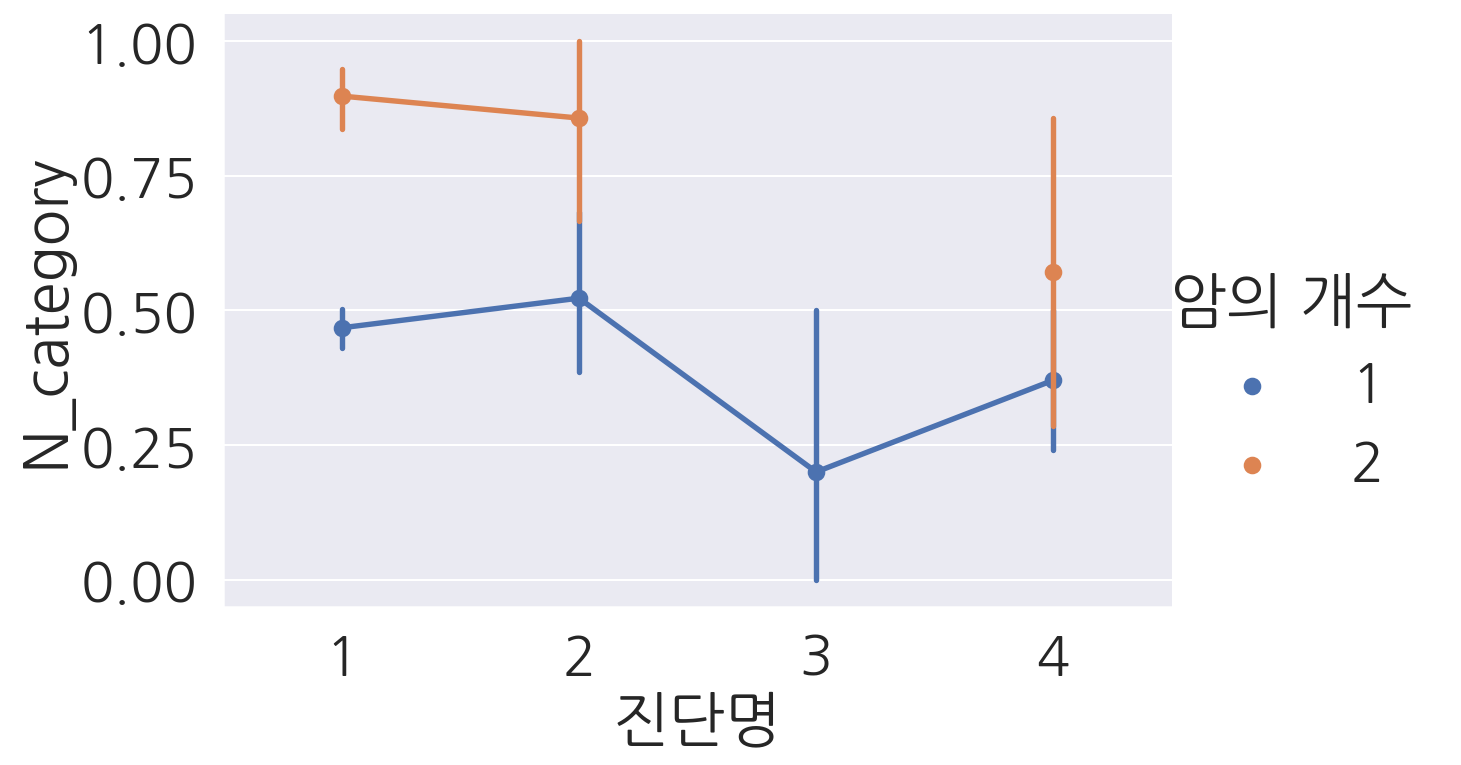

In [ ]:
sns.factorplot('진단명', 'N_category', hue = '암의 개수', data = df_train, size = 6, aspect = 1.5)

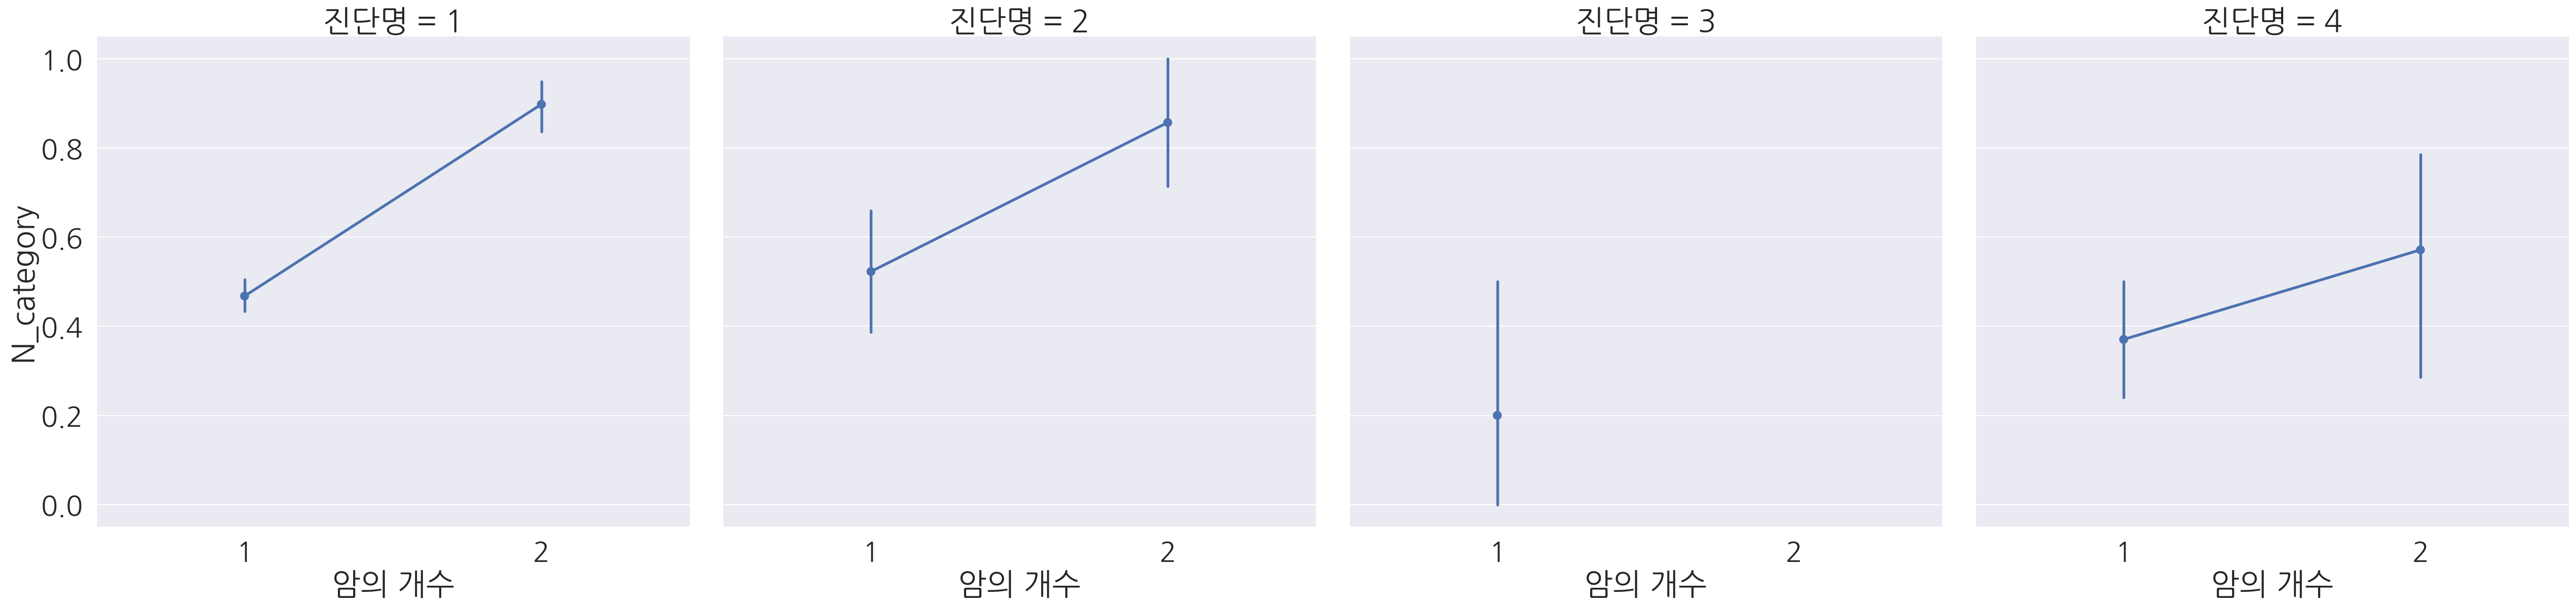

In [ ]:
sns.factorplot(x = '암의 개수', y = 'N_category', col = '진단명', data = df_train, satureation=.5, size = 9, aspect = 1)

* 모든 진단명에서 암의 개수가 여러개이면 전이될 확률이 높다.
* 좋은 예후인 mucinous는 암의 개수가 여러개인 경우도 없다.
* 1,2,3 외의 진단명은 여러가지가 있기 때문에 편차가 큰 분포를 보인다.
* 예후가 좋지 않을수록 암의 개수가 여러개일수록 전이될 확률이 높다.


### 3.4 나이

In [ ]:
print('제일 나이 많은 환자 : {:.1f}세'.format(df_train['나이'].max()))
print('제일 어린 환자 : {:.1f}세'.format(df_train['나이'].min()))
print('환자 평균 나이 : {:.1f}세'.format(df_train['나이'].mean()))

제일 나이 많은 환자 : 93.0세
제일 어린 환자 : 25.0세
환자 평균 나이 : 53.7세


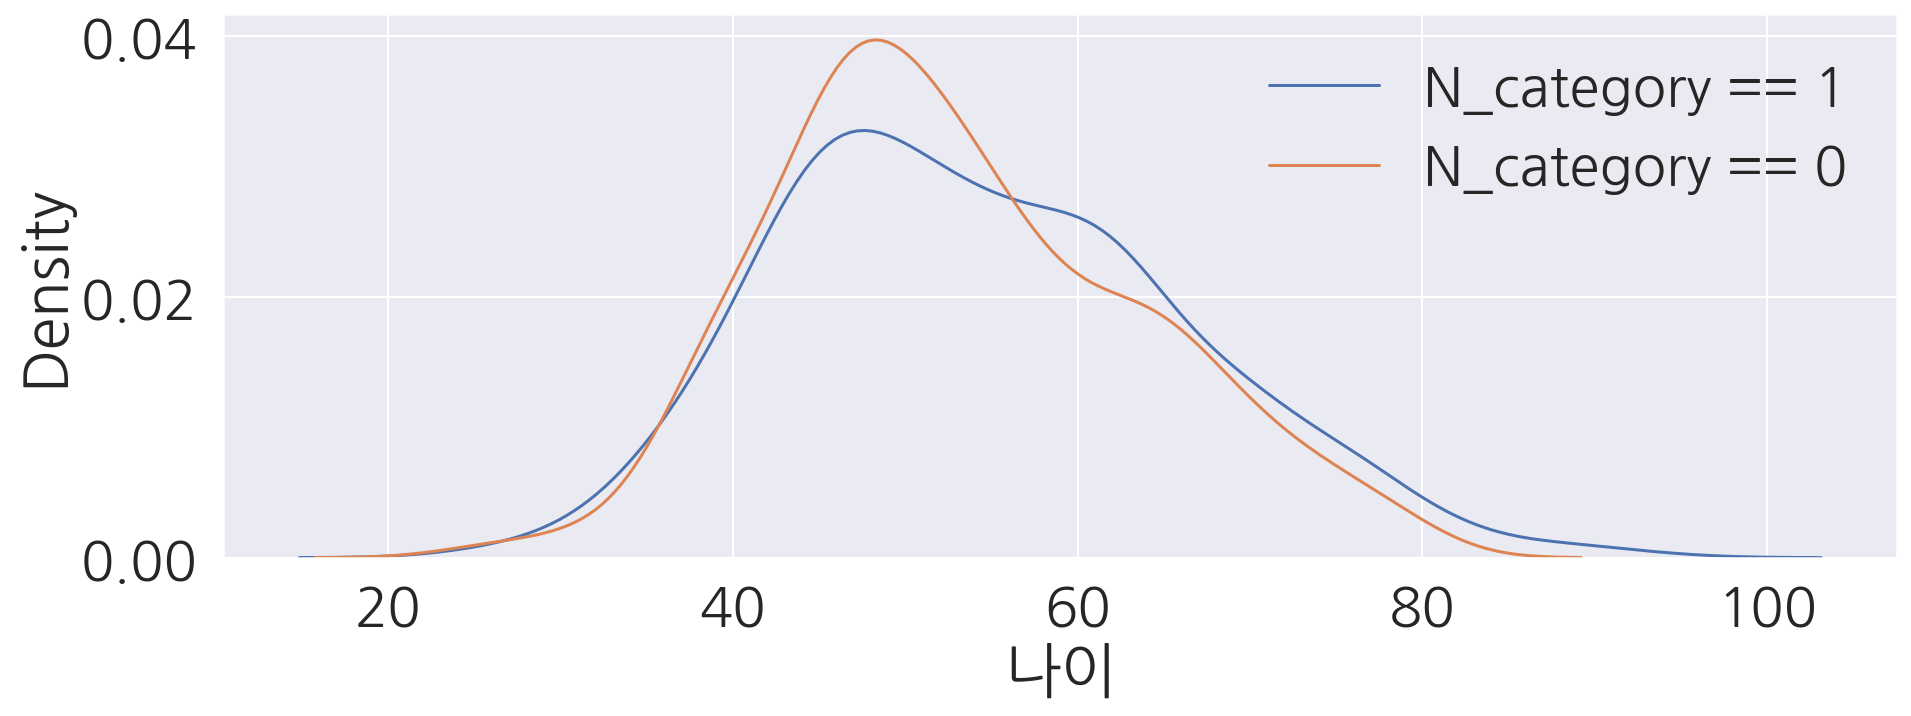

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 5))
sns.kdeplot(df_train[df_train['N_category'] == 1]['나이'], ax = ax) ## 전이o
sns.kdeplot(df_train[df_train['N_category'] == 0]['나이'], ax = ax) ## 전이x
plt.legend(['N_category == 1', 'N_category == 0'])
plt.show()

* 전이가 안된 경우는 나이가 어린 환자에게 많고 전이가 된 경우는 나이가 많은 환자에게 많이 나타났다.

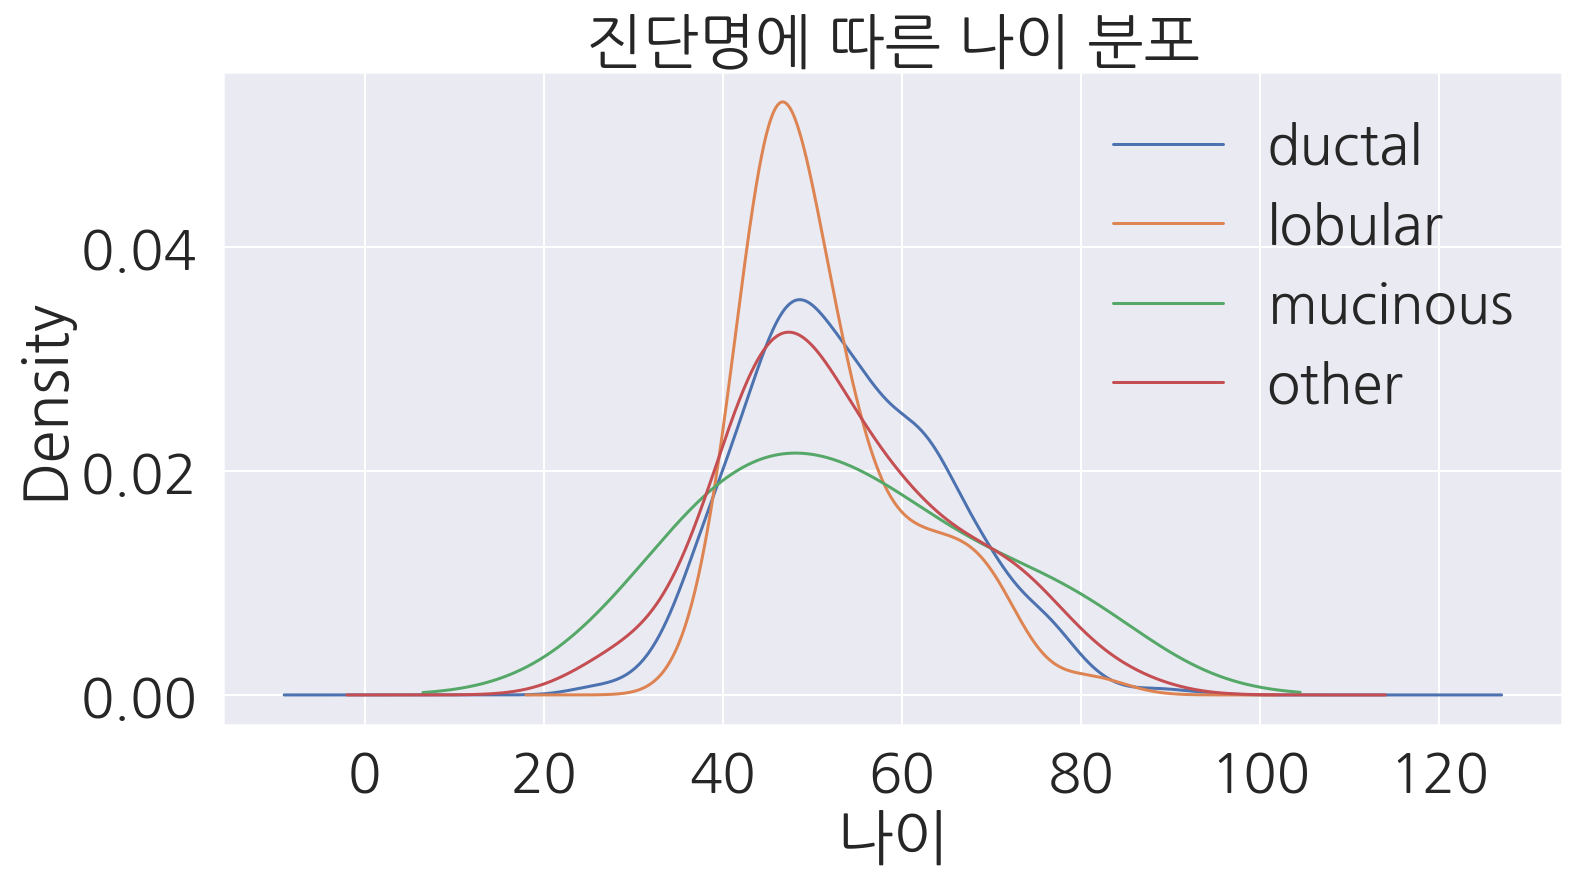

In [ ]:
plt.figure(figsize = (12,6))
df_train['나이'][df_train['진단명'] == 1].plot(kind='kde')
df_train['나이'][df_train['진단명'] == 2].plot(kind='kde')
df_train['나이'][df_train['진단명'] == 3].plot(kind='kde')
df_train['나이'][df_train['진단명'] == 4].plot(kind='kde')

plt.xlabel('나이')
plt.title('진단명에 따른 나이 분포')
plt.legend(['ductal', 'lobular', 'mucinous', 'other'])

* 진단명의 예후가 좋을수록 나이 어린 사람의 비중이 높다.

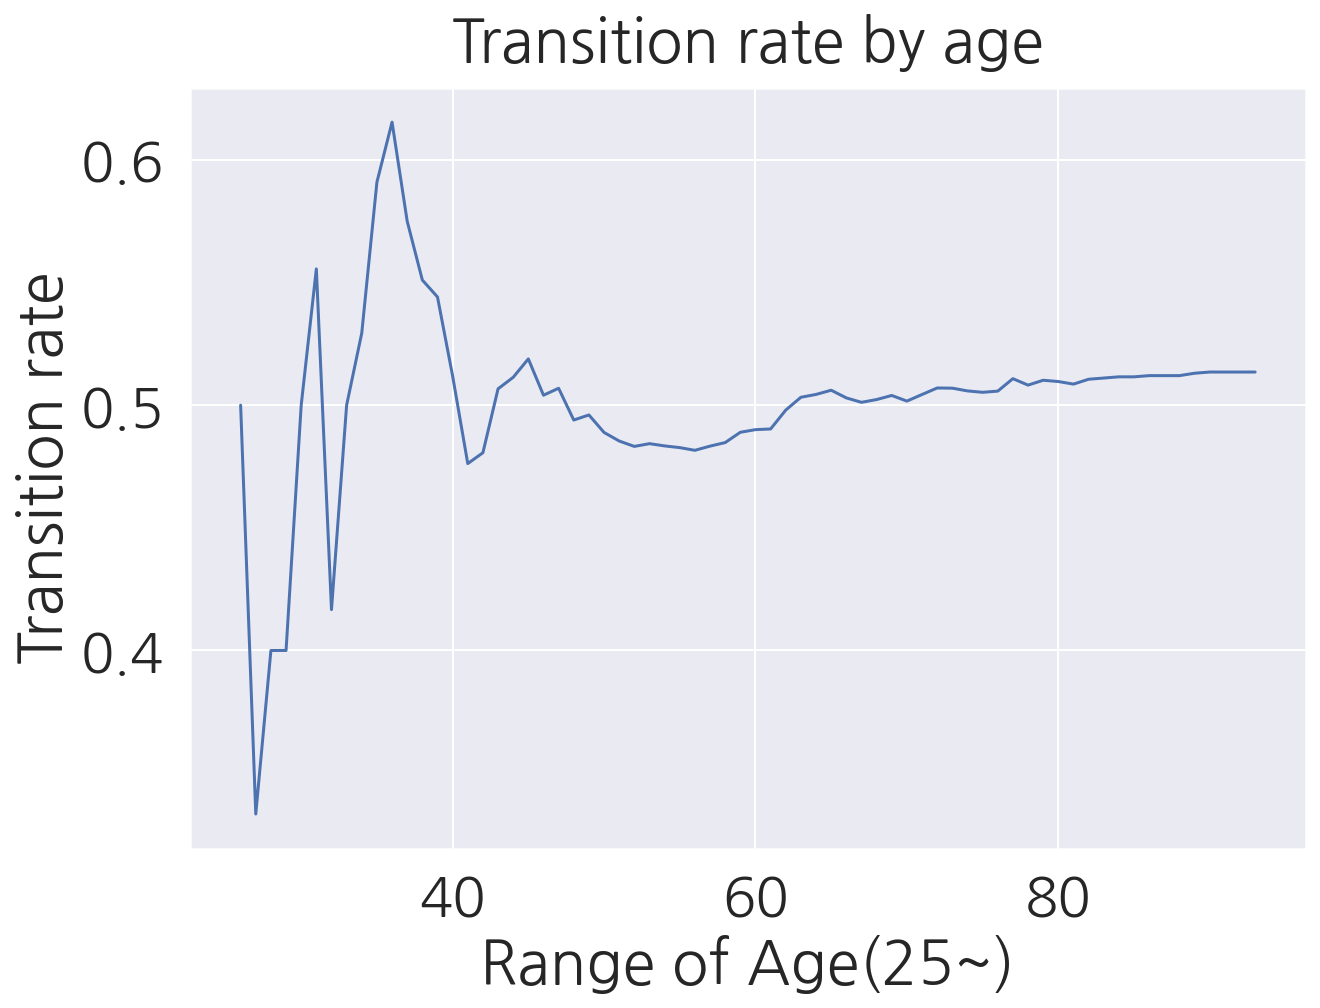

In [ ]:
# 나이대가 변하면서 전이율이 어떻게 되는지 보기

cummulate_metastasis_ratio = []

for i in range(0, 94):
    cummulate_metastasis_ratio.append(df_train[df_train['나이'] < i]['N_category'].sum() / len(df_train[df_train['나이'] < i]['N_category']))

plt.figure(figsize = (10,7))
plt.plot(cummulate_metastasis_ratio)
plt.title('Transition rate by age', y = 1.02)
plt.ylabel('Transition rate')
plt.xlabel('Range of Age(25~)')
plt.show()

* 나이가 많아질수록 미세하지만 전이율이 증가하는 추세이다.
* 나이가 어린 경우에는 전이율이 낮은 경우도 있고 높은 경우도 있다. 
* 전이율이 크게 나이와는 상관이 없을 수도 있다.

### 3.5 진단명, 암의 개수, 나이

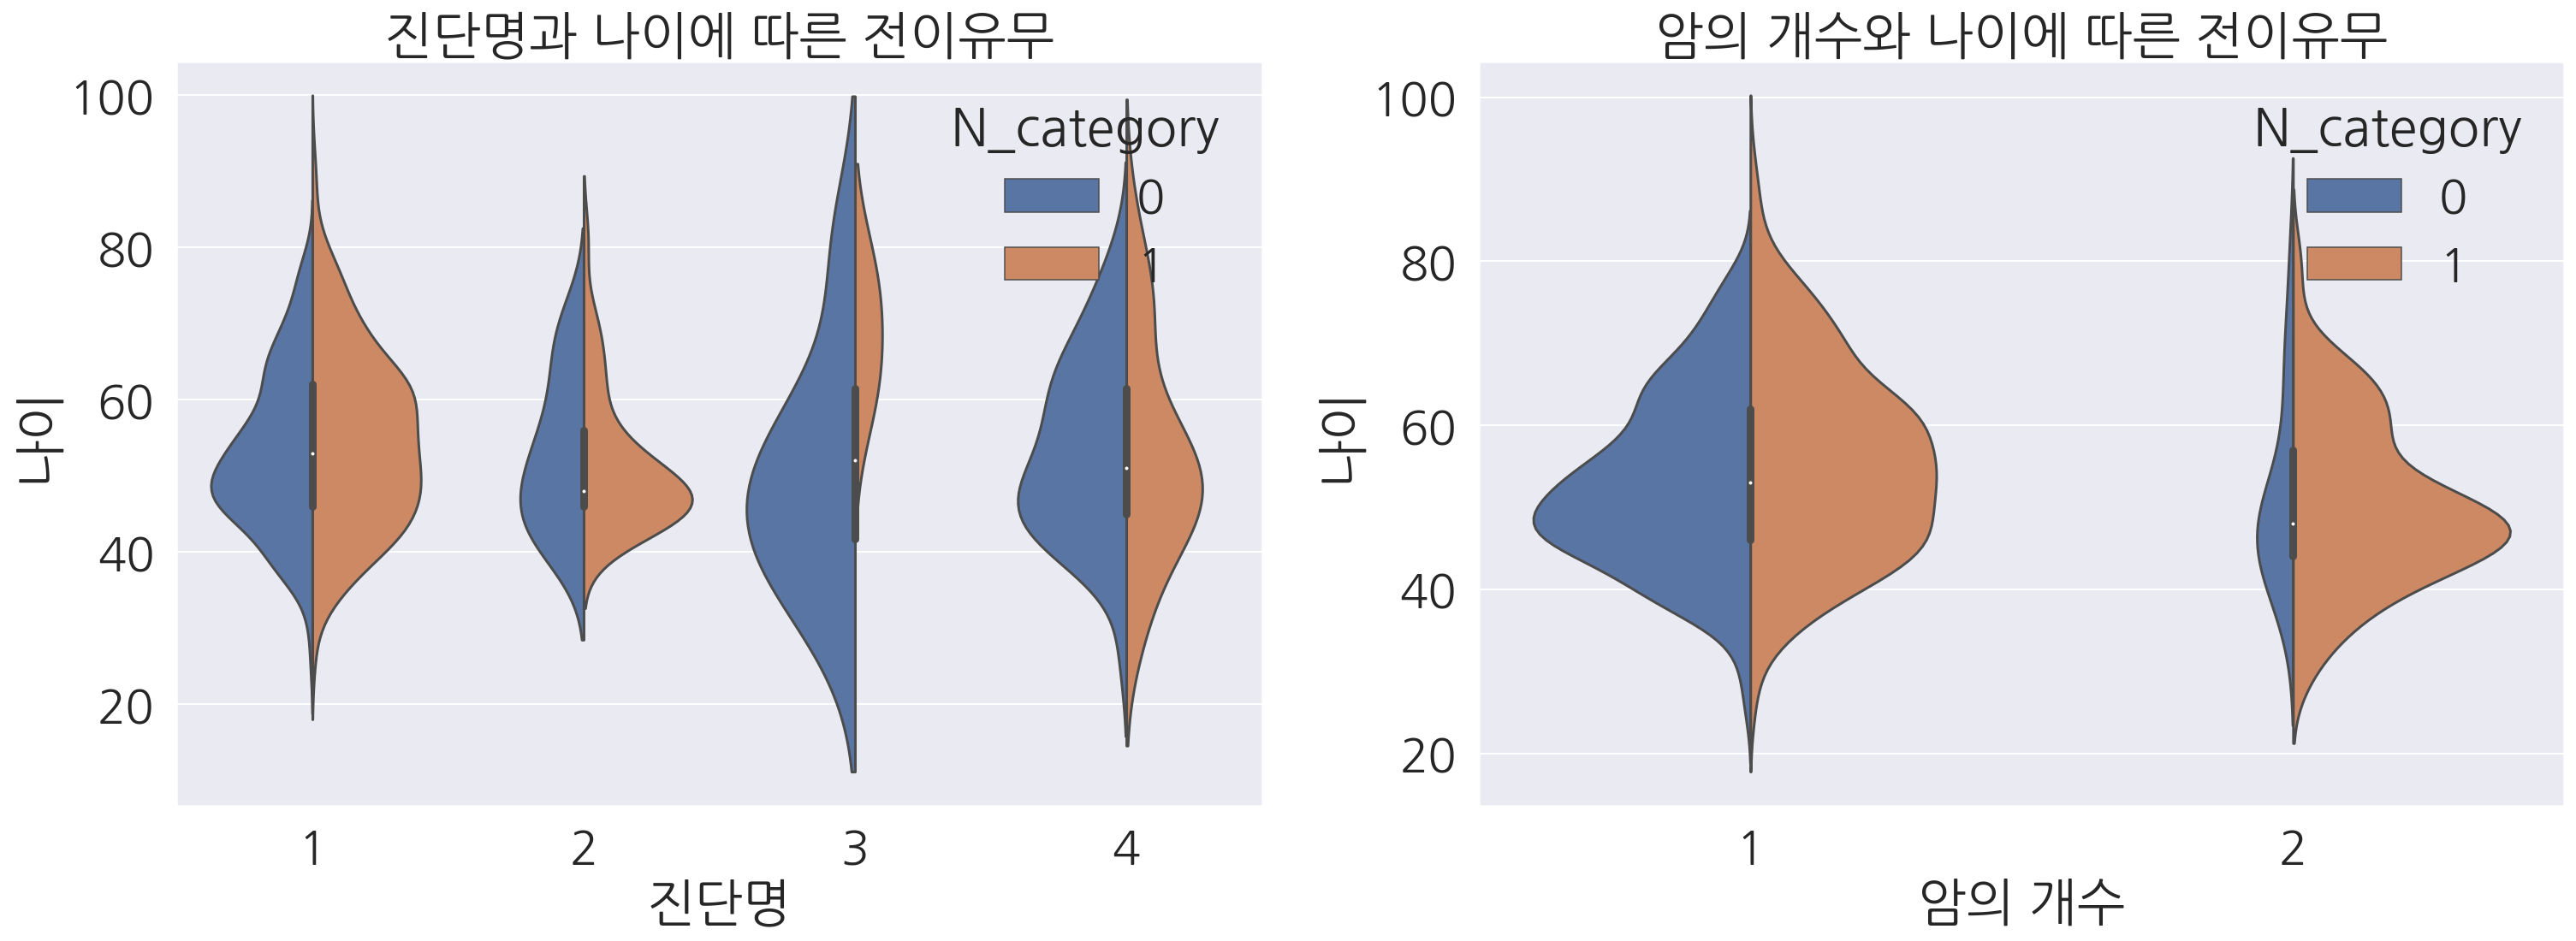

In [ ]:
f, ax = plt.subplots(1,2,figsize=(25,8))
sns.violinplot('진단명', '나이', hue = 'N_category', data = df_train, scale = 'count', split = True, ax = ax[0])
ax[0].set_title("진단명과 나이에 따른 전이유무")
# ax[0].set_yticks(range(0,100,10))
sns.violinplot("암의 개수", "나이", hue = 'N_category', data = df_train, scale = 'count', split = True, ax = ax[1])
ax[1].set_title("암의 개수와 나이에 따른 전이유무")
# ax[1].set_yticks(range(0,100,10))
plt.show()

* 미세하지만 나이가 어릴수록 전이된 사람보다 전이 안된 사람이 더 많다.
* 암의 개수가 여러개면 확실히 전이가 많이 된다.
* 좋은 예후인 진단명에서는 확실히 다른 진단명에 비해 전이 안된 경우가 많다. 그리고 나이가 어릴수록 좋은 예후를 진단 받았다.

### 3.6 암의 위치

* 1 : right(오른쪽) / 2: left(왼쪽) / 3: both(둘 다)
* 암의 위치가 큰 영향을 줄 것 같지는 않지만 시각화는 우선 해보았다.
* 암의 위치가 둘 다 인것은 암의 개수가 여러개일때만 해당될 것 같다. -> 위치가 both일때 전이율이 가장 높을까?

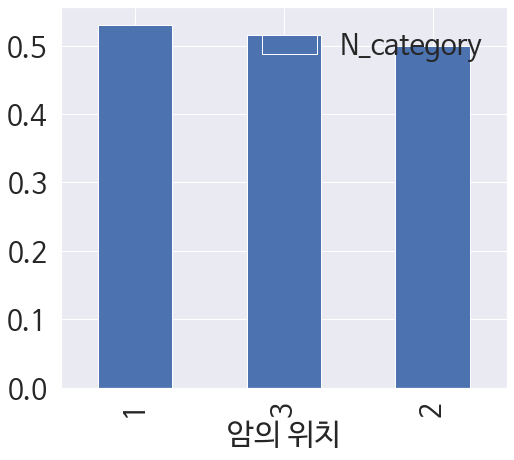

In [7]:
f, ax = plt.subplots(1, 1, figsize = (8, 7))
df_train [['암의 위치', 'N_category']].groupby(['암의 위치'], as_index = True).mean().sort_values(by='N_category', ascending=False).plot.bar(ax=ax)

* 오른쪽 > 둘 다> 왼쪽 순으로 전이율이 높지만 큰 차이는 없다.

Text(0.5, 1.0, '암의 개수 별 진단명에 따른 환자 수')

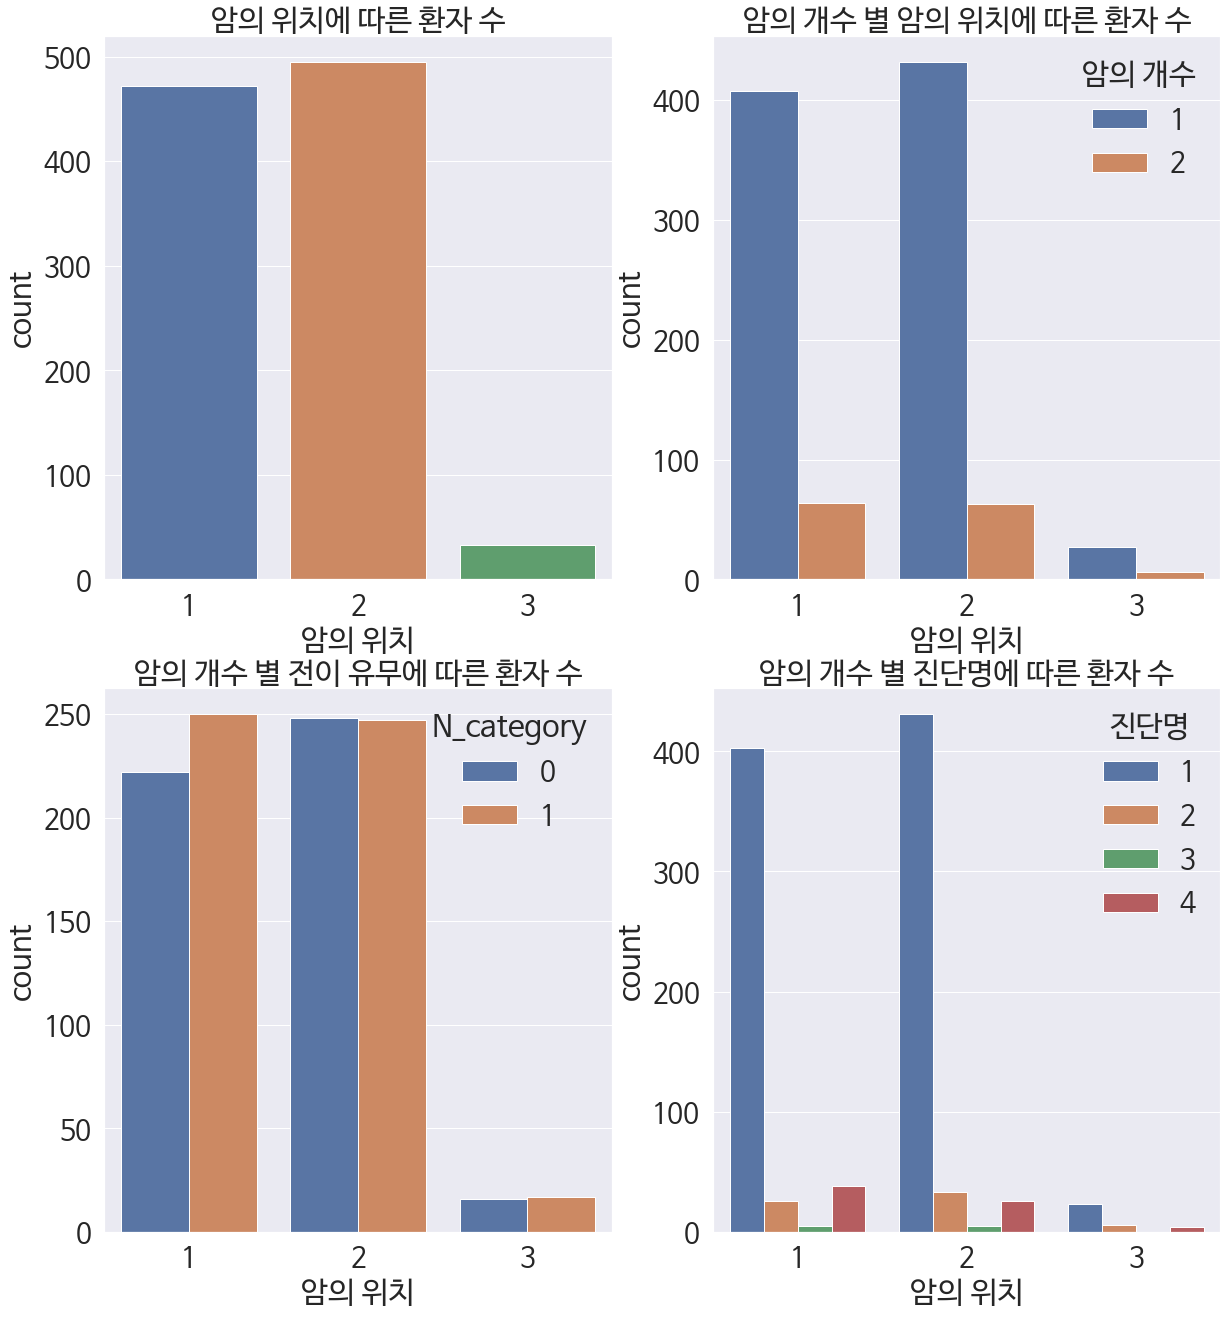

In [21]:
f, ax = plt.subplots(2, 2, figsize = (20, 22))
sns.countplot('암의 위치', data = df_train, ax = ax[0,0])
ax[0,0].set_title('암의 위치에 따른 환자 수')
sns.countplot('암의 위치', hue = '암의 개수', data = df_train, ax = ax[0,1])
ax[0,1].set_title('암의 개수 별 암의 위치에 따른 환자 수')
sns.countplot('암의 위치', hue = 'N_category', data = df_train, ax = ax[1,0])
ax[1,0].set_title('암의 개수 별 전이 유무에 따른 환자 수')
sns.countplot('암의 위치', hue = '진단명', data = df_train, ax = ax[1,1])
ax[1,1].set_title('암의 개수 별 진단명에 따른 환자 수')

* 미세하지만 암의 위치가 왼쪽인 경우가 오른쪽인 경우보다 많고 둘 다 인 경우는 별로 없다.
* 암의 위치가 둘 다 인 경우 암의 개수가 1개인 이유는??
* 암의 위치가 오른쪽에 있는 경우 미세하게 암의 개수가 2개인 경우가 많아서 오른쪽이 미세하게 전이율도 높았던것 같다.
* 암의 위치가 오른쪽인 경우 전이된 경우가 안된 경우보다 많았다. 나머지 경우는 비슷했다.
* 진단명이 ductal, lobular, mucinous인 경우에는 암의 위치가 왼쪽인 경우가 많지만 그 외의 경우에는 오른쪽인 경우가 많다.

### 3.7 HG_sum - HG_score_1 + HG_score_2 + HG_score_3

In [53]:
# HG_sum : 각 HG부분 별 합산 점수 
df_train['HG_sum'] = df_train['HG_score_1'] + df_train['HG_score_2'] + df_train['HG_score_3'] 

print("HG_sum 최대값 : ", df_train['HG_sum'].max())
print("HG_sum 최소값 : ", df_train['HG_sum'].min())

HG_sum 최대값 :  9.0
HG_sum 최소값 :  3.0


Text(0.5, 1.0, 'HG 합산 점수 별 전이 확률')

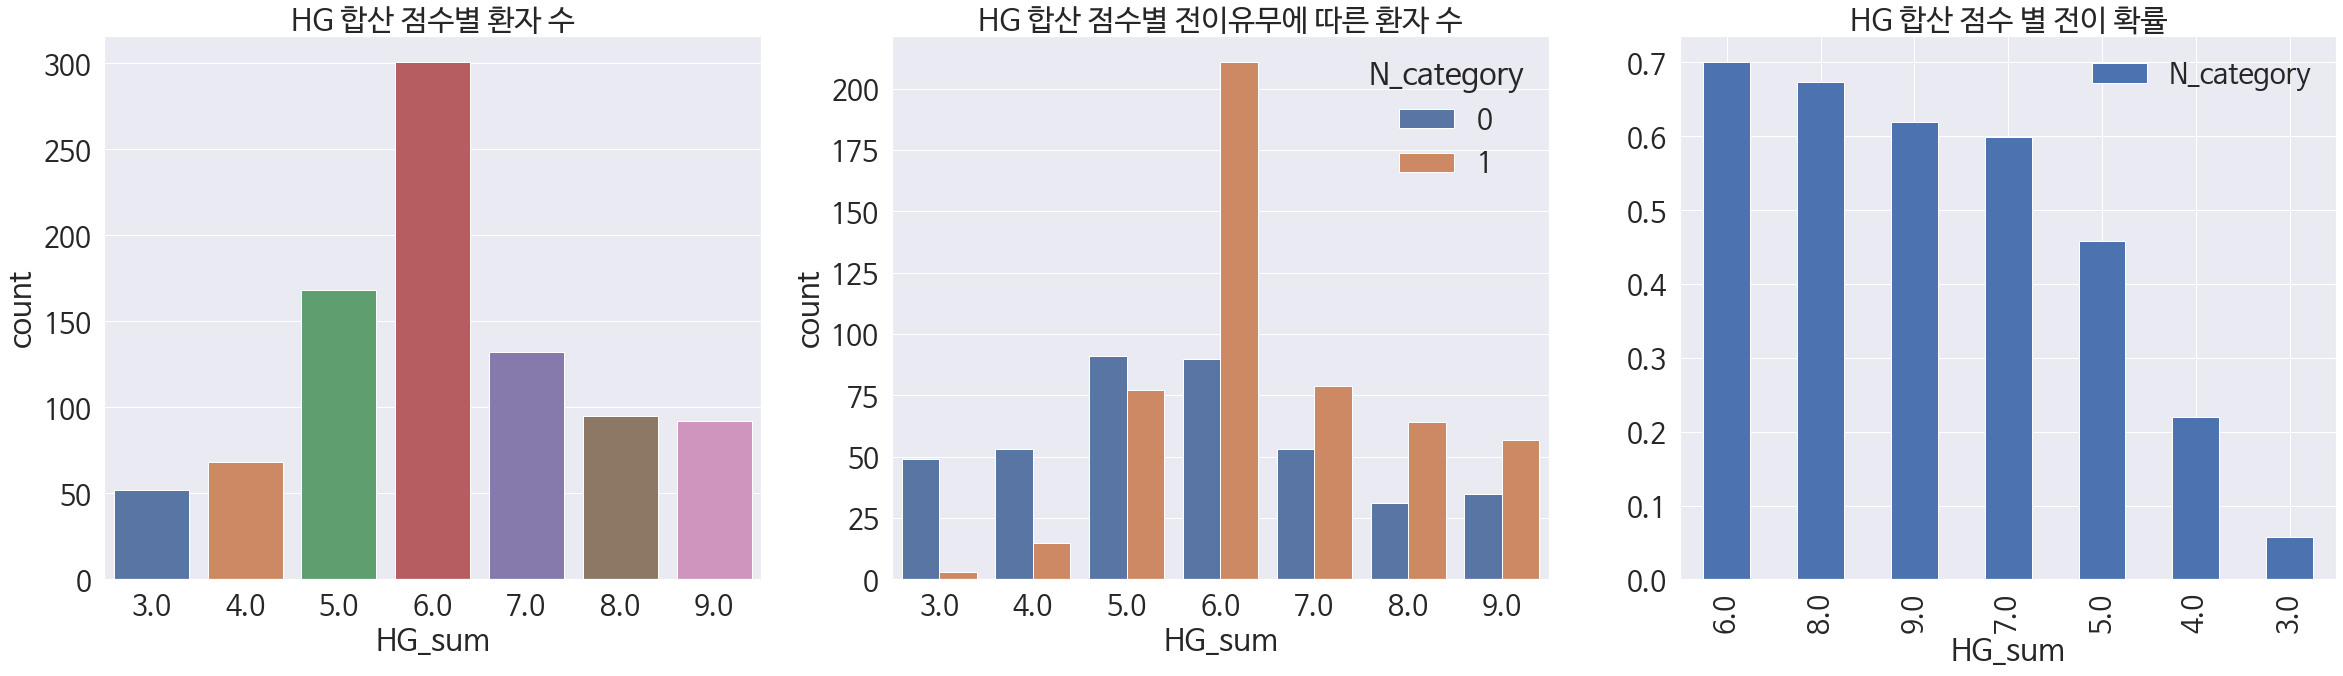

In [59]:
f, ax = plt.subplots(1, 3, figsize = (40, 10))
sns.countplot('HG_sum', data = df_train, ax = ax[0])
ax[0].set_title('HG 합산 점수별 환자 수')

sns.countplot('HG_sum', hue = 'N_category', data = df_train, ax = ax[1])
ax[1].set_title('HG 합산 점수별 전이유무에 따른 환자 수')

df_train[['HG_sum', 'N_category']].groupby(['HG_sum'], as_index = True).mean().sort_values(by='N_category', ascending = False).plot.bar(ax = ax[2])
ax[2].set_title('HG 합산 점수 별 전이 확률')

* HG 합산 점수가 3~9까지 있고 대부분 6점입니다.
* HG - 1 : HG1(합산 점수가 3,4,5),  2 : HG2(합산 점수가 6,7), 3 : HG3(합산 점수가 8,9), 점수가 높을수록 조직화적 분화도가 나쁜것이다. (4 : 등급 x)
* HG_score_1, HG_score_2, HG_score_3 : 점수가 높을수록 안 좋음(4 : 등급 x)
* HG1 그룹은 전이가 안된 확률이 더 높고 HG2, HG3그룹은 전이가 된 확률이 더 높다.
* 조직화적 분화도가 더 나쁜 8,9점보다 6점이 전이 확률이 높은 이유는??

### 3.8 암의 장경

* 암의 장경 : 암의 크기(mm), 여러 개인 경우에는 가장 큰 종양의 장경
* contious feature이다.

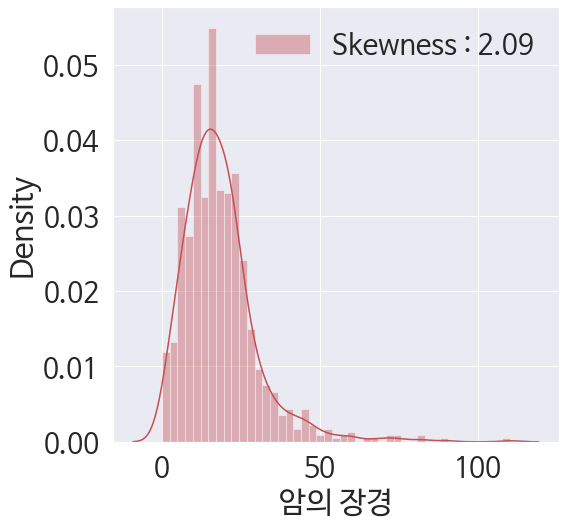

In [4]:
fig, ax = plt.subplots(1, 1, figsize = (8,8))
g = sns.distplot(df_train['암의 장경'], color = 'r', label = 'Skewness : {:.2f}'.format(df_train['암의 장경'].skew()), ax = ax)
g = g.legend(loc='best')

* 왜도가 2.09로 매우 비대칭한 정도는 아니지만 정규분포라고는 할 수 없다. 
* 왜도가 너무 높게 나왔을 경우 예측에 좋지 않기 때문에 log를 취해주는 것이 좋다.

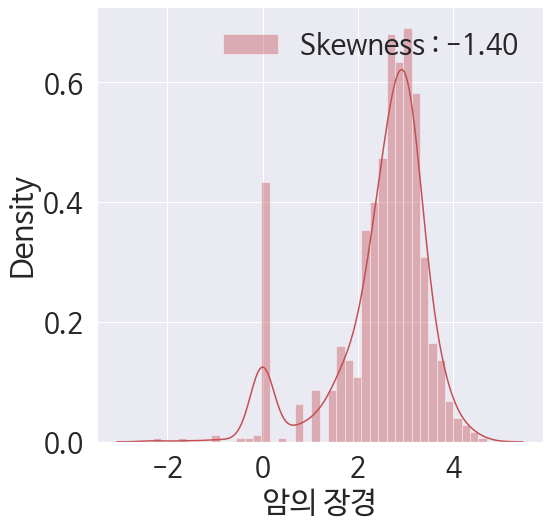

In [10]:
# log로 변환
df_train['암의 장경'] = df_train['암의 장경'].map(lambda i : np.log(i) if i > 0  else 0)

fig, ax = plt.subplots(1, 1, figsize = (8,8))
g = sns.distplot(df_train['암의 장경'], color = 'r', label = 'Skewness : {:.2f}'.format(df_train['암의 장경'].skew()), ax = ax)
g = g.legend(loc='best')

* 왜도가 낮아지긴 했지만 유의미한지는 모르겠다.

### 3.9 DCIS_or_LCIS_type, HER2_SISH, HER2_SISH_ratio, BRCA_mutation

* 위 변수들은 NaN이 75%이상이기 때문에 예측하는 사용하지 않을 것입니다.